## Logistic Regression

In this notebook, we'll walk step-by-step through performing logistic regression using the Titanic dataset. We'll cover each of the following steps clearly and thoroughly:

1. Loading and inspecting the dataset.
2. Preprocessing: Handling missing values and encoding categorical data.
3. Splitting the data into training and testing sets.
4. Training a logistic regression model.
5. Evaluating the model's performance.
6. Checking assumptions for logistic regression.
7. Interpreting the model's results clearly.

### **Step 1: Load and Inspect the Data**
We'll use the Titanic dataset, a popular dataset for predicting passenger survival based on various features.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Load Titanic dataset in seaborn
df = sns.load_dataset('titanic')

# Inspect the dataset
df.head()

# What we want to predict is what are the features and what is the probability of any person of this dataset surviving the titanic shipwreck
# We want to take our features (class, sex, age, siblings/spouses, children/parents, fare) to predict a person's survival

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Step 2: Preprocess the Data**
Before training our model, we must prepare the dataset. This step involves two key processes:

*2.1 Handle Missing Values*
Logistic regression requires datasets without missing values, so we remove rows with missing data in important columns (age, embarked).

*2.2 Encode Categorical Variables*
Machine learning algorithms require numerical inputs. Therefore, categorical variables (sex, embarked) must be converted into numeric form using one-hot encoding.

- Why encoding?
    - Converts categorical labels into numeric values that the model can interpret.
    - Avoids misinterpretation of categorical variables as numeric variables (e.g., treating "male" as numerically greater or less than "female").

In [ ]:
# Limitation to logistic regression: it requires absolutely no missing values in your training and testing sets
# Requires you to encode any categorical variables you may have -- we're going to need to encode the "sex" column

In [2]:
# Handling missing values
df.info() # tells us which columns have missing values; we can see that the age column has missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df = df.dropna(subset=["age"]) # only dropping on the column of age; can also do , inplace = True instead of reassigning
df # now we only have 714 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# Encoding categorical variables
# Use drop_first = True to avoid "dummy trap"
# creates a new column that is numeric by giving either a 1 or a 0 (dummy vars)
df = pd.get_dummies(df, columns = ["sex"], drop_first = True) # using pd instead of df; don't forget to reassign each time
df

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,False
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


In [5]:
# Define features and target
features = ["pclass", "age", "sibsp", "parch", "fare", "sex_male"] # grabbing dummy column instead of "sex"
X = df[features]
y = df["survived"]

In [6]:
# Preview the cleaned dataset
print(X.head())
print(y.head())

   pclass   age  sibsp  parch     fare  sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## **Step 3: Split the Data**
We divide our dataset into two subsets:
- *Training Set*: To build our logistic regression model.
- *Testing Set*: To evaluate the performance of our model.

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## **Step 4: Train the Logistic Regression Model**
We'll now build and train our logistic regression model using the training data.

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
model = LogisticRegression() # class does nothing unless you initiate it
model.fit(X_train, y_train) # we don't have to reassign model because it's a method on a class

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Step 5: Evaluate the Model**
To understand how well our model predicts survival, we use the following evaluation metrics:
- *Accuracy*: Proportion of correct predictions.
- *Confusion Matrix*: Breakdown of predictions (True positives, True negatives, False positives, False negatives).
- *Classification Report*: Precision, recall, and F1-score.

In [11]:
import matplotlib.pyplot as plt # going to let us create nice graphics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # to get metrics and confusion matrix

In [ ]:
# Predict on test data; taking 20% of the data and using predict method, which takes the xtest and the rules from xtrain and ytrain; going to get a set of predicted y's
y_pred = model.predict(X_test)
y_pred # this give us an array of all of the predictions of our xtest
# 0 = 0% chance of survival, 1 = 100% chance of survival

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) # takes in true y values and the predicted y values that we just got above
accuracy
# about a 75% accuracy in determining if someone is surviving the titanic or not

0.7482517482517482

<function matplotlib.pyplot.show(close=None, block=None)>

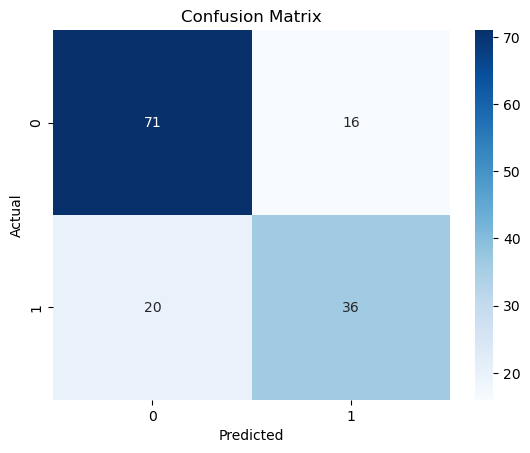

In [31]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# gives us the matrix but it looks ugly and not easy to understand
sns.heatmap(cm, annot = True, cmap = "Blues") 
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show
# you want the most predictions to be in top left and bottom right
# 36 of our observations were misclassified
# kind of a bias for predicting towards not survival, probably because we have an actual large amount of non-survivals

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))
# f1-score is much less accurate for survival; we're better at predicting 0's than 1's
# the support shows us the number of "actuals" in our set

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [ ]:
y_train.value_counts()
# we have 337 died, 234 survived in the training set -- quite the imbalance; this is why the model predicts non-survival better
# when you do your training, the count of each class that you put through your training will determine/bias your model towards the category that has more in the training set
# it can "cheat" because it can choose 0 more than 1 just to be more accurate instead of "understanding" the situation
# two main ways to get around this: oversampling or undersampling of either class

survived
0    337
1    234
Name: count, dtype: int64

## **Step 6: Examining and Interpreting the Model**
After training our logistic regression model, let's examine the coefficients to understand their meaning in more detail.
- Coefficients in logistic regression represent the effect of each feature on the log-odds of the target (survival in this case).
- Positive coefficients increase the odds of the outcome (survival).
- Negative coefficients decrease the odds of the outcome (survival).
- The magnitude of coefficients shows the strength of each feature's influence.

### 6.1 Interpreting Coefficients
After training our logistic regression model, let's examine the coefficients to understand their meaning in more detail.
- Coefficients in logistic regression represent the effect of each feature on the log-odds of the target (survival in this case).
- Positive coefficients increase the odds of the outcome (survival).
- Negative coefficients decrease the odds of the outcome (survival).
- The magnitude of coefficients shows the strength of each feature's influence.

Output:
- Coefficient Interpretation:
    - Positive coefficients: Increase the log-odds (and thus probability) of survival.
    - Negative coefficients: Decrease the log-odds (and thus probability) of survival.



| Feature      | Coefficient | Impact on Survival Probability                      | Explanation                                                    |
|--------------|-------------|-----------------------------------------------------|----------------------------------------------------------------|
| `pclass`     | -1.21       | Decreases                                           | Lower passenger classes (higher numeric values) decrease survival odds.            |
| `age`        | -0.04       | Slight negative impact                              | Older passengers have slightly lower odds of survival.         |
| `sibsp`      | -0.35       | Negative impact                                     | Having more siblings/spouses aboard decreases survival odds.   |
| `parch`      | -0.05       | Slight negative impact                              | Having more parents/children aboard slightly reduces odds.     |
| `fare`       | 0.002      | Very slight positive impact                         | Paying higher fares slightly increases survival odds.          |
| `sex_male`   | -2.61       | Strong negative impact                              | Being male greatly decreases the probability of survival.      |
| **Intercept**| 5.47        | Baseline log-odds                                   | Baseline survival odds for females with lowest-class, fare, age, ect. |


In [36]:
# Extract coefficients and intercept
coef = pd.Series(model.coef_[0], index = features)
intercept = model.intercept_[0]

In [37]:
# Display coefficients
print(coef)
print(intercept)

pclass     -1.214332
age        -0.048916
sibsp      -0.354475
parch      -0.056625
fare        0.002063
sex_male   -2.615038
dtype: float64
5.4717916528765596


### 6.2 Understanding the `predict_proba` Function
Logistic regression outputs probabilities between 0 and 1, indicating the likelihood of belonging to a specific class.
- The function predict_proba() returns two columns:
    - Probability of class 0 (not survived).
    - Probability of class 1 (survived).
- Output:
    - Each row gives the probability of not surviving (first column) and surviving (second column).
    - Useful for making informed decisions based on probabilities rather than just binary predictions.

In [ ]:
# Get predicted probabilities for the test set
model.predict_proba(X_test)[:5]
# we can see that the first 5 observation pairs: tells us the probability of (0, 1) for each observatiion
# Ex: for the first observation, the probability that that person will die is 83% and 16% that they will survive
# Ex: the second observation was very close to a 50-50 shot of surviving

array([[0.83195695, 0.16804305],
       [0.52275478, 0.47724522],
       [0.21019947, 0.78980053],
       [0.03818338, 0.96181662],
       [0.94666329, 0.05333671]])

In [ ]:
# Display probabilities for first 5 test observations
X_test # put this to compare each person's unique situation and then see how that matches up with the % chance of surviving

,pclass,age,sibsp,parch,fare,sex_male
149,2,42.0,0,0,13.0000,True
407,2,3.0,1,1,18.7500,True
53,2,29.0,1,0,26.0000,False
369,1,24.0,0,0,69.3000,False
818,3,43.0,0,0,6.4500,True
...,...,...,...,...,...,...
819,3,10.0,3,2,27.9000,True
164,3,1.0,4,1,39.6875,True
363,3,35.0,0,0,7.0500,True
56,2,21.0,0,0,10.5000,False


In [43]:
# Going from log odds to probability 
import numpy
odds = np.exp(-2.61)
odds

0.0735345437630571

In [ ]:
# to get probability
odds / (1 + odds)
# if you're a male your log odds of surviving are around 7%

0.0684976037243261

In [48]:
fake = pd.Series([2, 19, 3, 4, 26, 1]) # features for all of our categories

model.predict([fake])
model.predict_proba([fake])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.85038264, 0.14961736]])